<a href="https://colab.research.google.com/github/swapnil2009/DataScience/blob/main/Diamonds_Pricing_xgbregressor_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Diamond is a solid form of the element carbon.
* It is the hardest material found on Earth.
* Unlike other non-metals, diamond has a high termal conductivity.
* Due to these reasons, Diamond is a very expensive material.
In the following program, we will prepare a Linear Regression Model to predict the price of diamond given its properties like the cut, purity, etc.

# **1. Domain Knowledge**

In [42]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [43]:
# Importing the data set
df=pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
# Removing the first column coz not needed
df=df.drop(["Unnamed: 0"],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **2. Summary of the Dataset**
The given dataset contains the following attributes:
* carat
* cut
* color
* clarity
* depth
* table
* price

# **3. Is there any data type mismatch in Dataset? If so try to convert the attributes to the required Data type.**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


We observe that there is NO DATA MISMATCH
* carat -> float
* cut -> obj
* color -> obj
* clarity -> obj
* depth -> float
* table -> float
* price -> int

# **4. Is there any missing values in Dataset? If so mention & justify the method handled for missing values?**


In [46]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


There is a possibility that there ain't any null values but some other entry like "." or "-" .So we check all the unique values in each row to get a beter picture.

In [47]:
l=df.carat.unique()
l.sort()
l

array([0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
       0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41,
       0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52,
       0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63,
       0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74,
       0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85,
       0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96,
       0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07,
       1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18,
       1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29,
       1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 ,
       1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51,
       1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62,
       1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.

In [48]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [49]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [50]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [51]:
l=df.depth.unique()
l.sort()
l

array([43. , 44. , 50.8, 51. , 52.2, 52.3, 52.7, 53. , 53.1, 53.2, 53.3,
       53.4, 53.8, 54. , 54.2, 54.3, 54.4, 54.6, 54.7, 55. , 55.1, 55.2,
       55.3, 55.4, 55.5, 55.6, 55.8, 55.9, 56. , 56.1, 56.2, 56.3, 56.4,
       56.5, 56.6, 56.7, 56.8, 56.9, 57. , 57.1, 57.2, 57.3, 57.4, 57.5,
       57.6, 57.7, 57.8, 57.9, 58. , 58.1, 58.2, 58.3, 58.4, 58.5, 58.6,
       58.7, 58.8, 58.9, 59. , 59.1, 59.2, 59.3, 59.4, 59.5, 59.6, 59.7,
       59.8, 59.9, 60. , 60.1, 60.2, 60.3, 60.4, 60.5, 60.6, 60.7, 60.8,
       60.9, 61. , 61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8, 61.9,
       62. , 62.1, 62.2, 62.3, 62.4, 62.5, 62.6, 62.7, 62.8, 62.9, 63. ,
       63.1, 63.2, 63.3, 63.4, 63.5, 63.6, 63.7, 63.8, 63.9, 64. , 64.1,
       64.2, 64.3, 64.4, 64.5, 64.6, 64.7, 64.8, 64.9, 65. , 65.1, 65.2,
       65.3, 65.4, 65.5, 65.6, 65.7, 65.8, 65.9, 66. , 66.1, 66.2, 66.3,
       66.4, 66.5, 66.6, 66.7, 66.8, 66.9, 67. , 67.1, 67.2, 67.3, 67.4,
       67.5, 67.6, 67.7, 67.8, 67.9, 68. , 68.1, 68

In [52]:
l=df.table.unique()
l.sort()
l

array([43. , 44. , 49. , 50. , 50.1, 51. , 51.6, 52. , 52.4, 52.8, 53. ,
       53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54. , 54.1,
       54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9, 55. , 55.1, 55.2,
       55.3, 55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56. , 56.1, 56.2, 56.3,
       56.4, 56.5, 56.6, 56.7, 56.8, 56.9, 57. , 57.1, 57.2, 57.3, 57.4,
       57.5, 57.6, 57.7, 57.8, 57.9, 58. , 58.1, 58.2, 58.3, 58.4, 58.5,
       58.6, 58.7, 58.8, 58.9, 59. , 59.1, 59.2, 59.3, 59.4, 59.5, 59.6,
       59.7, 59.8, 59.9, 60. , 60.1, 60.2, 60.3, 60.4, 60.5, 60.6, 60.7,
       60.8, 60.9, 61. , 61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8,
       61.9, 62. , 62.1, 62.2, 62.3, 62.4, 62.5, 62.6, 62.8, 63. , 63.3,
       63.4, 63.5, 64. , 64.2, 64.3, 65. , 65.4, 66. , 67. , 68. , 69. ,
       70. , 71. , 73. , 76. , 79. , 95. ])

In [53]:
l=df.price.unique()
l.sort()
l

array([  326,   327,   334, ..., 18806, 18818, 18823])

Therefore we conclude that THERE ARE NO NULL VALUES in the given dataset

# **6. Is there any categorical variables in Dataset? What are they? Convert the categorical values to numeric.**

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


We see that there are 3 categorical features:
1. cut
2. color
3. clarity

In [55]:
print(df.cut.unique())
df.cut.replace(["Fair","Ideal","Good","Very Good","Premium"],[0,1,2,3,4],inplace=True)
print(df.cut.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
[1 4 2 3 0]


In [56]:
print(df.color.unique())
df.color.replace(['E', 'I', 'J', 'H', 'F', 'G', 'D'],[0,1,2,3,4,5,6],inplace=True)
print(df.color.unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
[0 1 2 3 4 5 6]


In [57]:
print(df.clarity.unique())
df.clarity.replace(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], [0,1,2,3,4,5,6,7],inplace=True)
print(df.clarity.unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
[0 1 2 3 4 5 6 7]


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


Now we have converted all the categorical data types to integer data types by the replace method.

# **5. Are there any Outliers in Dataset? Mention the methods for outliers detection, which method is the best one justify & remove outliers using the same method.**

USING GRAPHS

In [59]:
import warnings
warnings.filterwarnings('ignore')

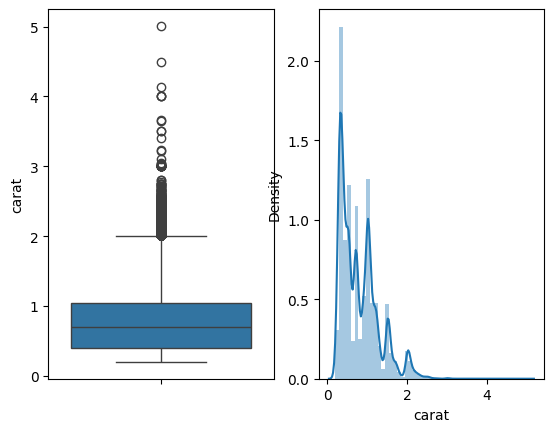

In [60]:
# OUTLIERS IN CARAT
plt.subplot(1,2,1)
p1=sns.boxplot(df.carat)
plt.subplot(1,2,2)
p2=sns.distplot(df.carat)

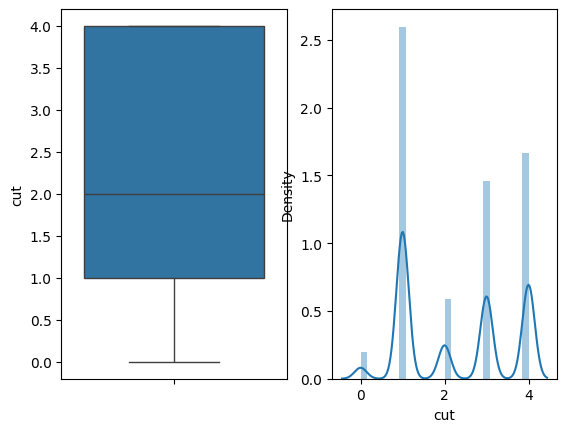

In [61]:
# OUTLIERS IN CUT
plt.subplot(1,2,1)
p1=sns.boxplot(df.cut)
plt.subplot(1,2,2)
p2=sns.distplot(df.cut)

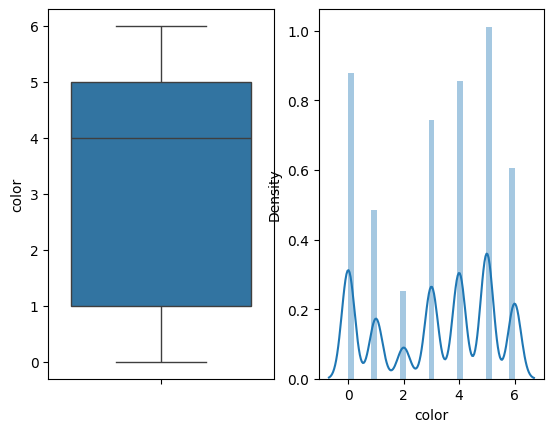

In [62]:
# OUTLIERS IN COLOR
plt.subplot(1,2,1)
p1=sns.boxplot(df.color)
plt.subplot(1,2,2)
p2=sns.distplot(df.color)

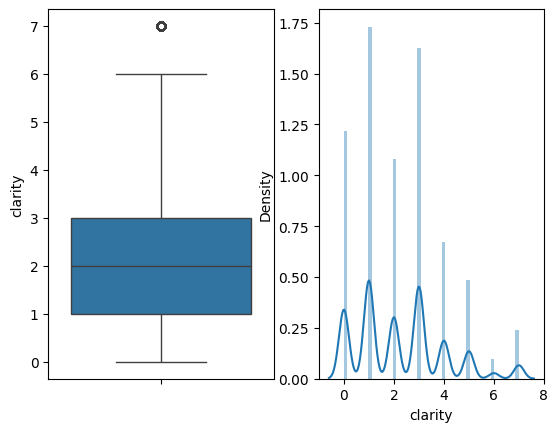

In [63]:
# OUTLIERS IN CLARITY
plt.subplot(1,2,1)
p1=sns.boxplot(df.clarity)
plt.subplot(1,2,2)
p2=sns.distplot(df.clarity)

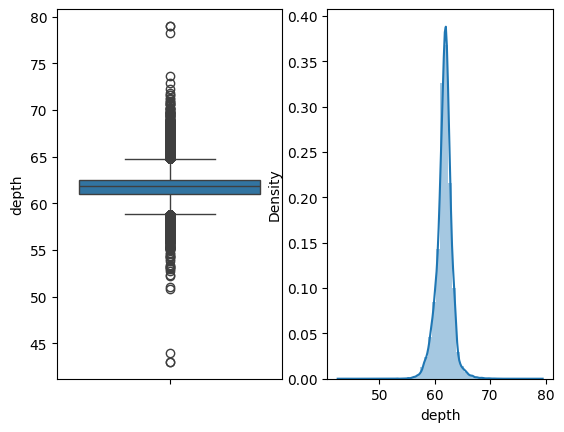

In [64]:
# OUTLIERS IN DEPTH
plt.subplot(1,2,1)
p1=sns.boxplot(df.depth)
plt.subplot(1,2,2)
p2=sns.distplot(df.depth)

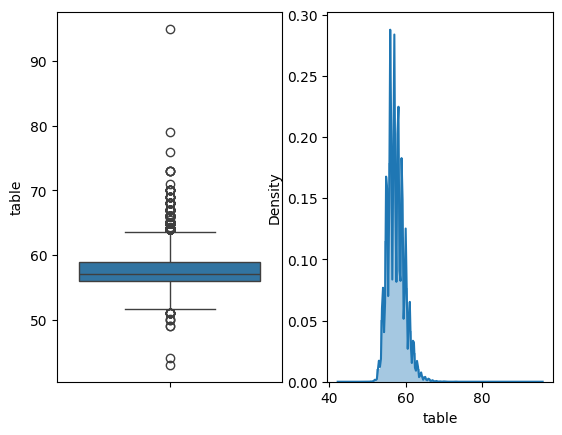

In [65]:
# OUTLIERS IN TABLE
plt.subplot(1,2,1)
p1=sns.boxplot(df.table)
plt.subplot(1,2,2)
p2=sns.distplot(df.table)

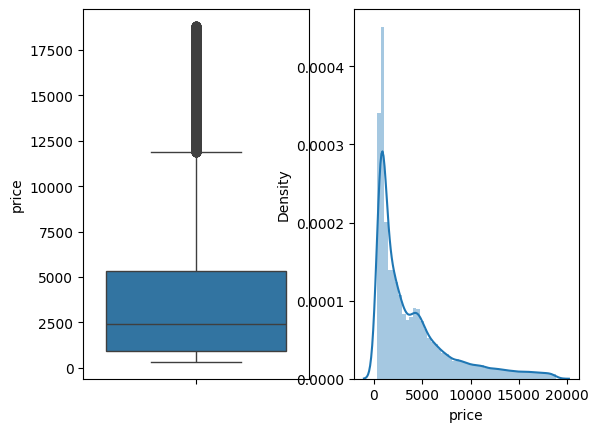

In [66]:
# OUTLIERS IN PRICE
plt.subplot(1,2,1)
p1=sns.boxplot(df.price)
plt.subplot(1,2,2)
p2=sns.distplot(df.price)

CREATING A NEW VARIABLE FOR A DATA SET WITH NO OUTLIERS.

In [67]:
new_df=df.copy(deep=True)
print(df.shape,new_df.shape)

(53940, 10) (53940, 10)


In [68]:
def Outliers_Treatment(new_df,col):
    q1=new_df[col].quantile(0.25)
    q3=new_df[col].quantile(0.75)
    iqr=q3-q1
    print(col,iqr)
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    p1=plt.subplot(1,2,1)
    sns.boxplot(df[col])
    p2=plt.subplot(1,2,2)
    sns.boxplot(new_df[col])
    #plt.show()
    new_df.drop(new_df[(new_df[col]<lb) | (new_df[col]>ub)].index, inplace=True)

The IQR value for each feature:
carat 0.64
cut 3.0
color 4.0
clarity 2.0
depth 1.3999999999999986
table 3.0
price 4096.0
x 1.75
y 1.7300000000000004
z 1.0900000000000003


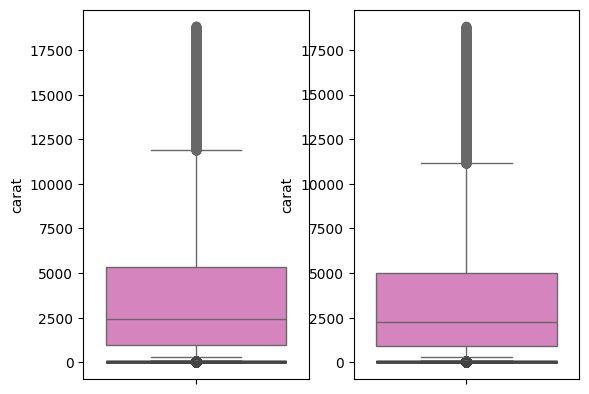

In [69]:
print("The IQR value for each feature:")
Outliers_Treatment(new_df,"carat")
Outliers_Treatment(new_df,"cut")
Outliers_Treatment(new_df,"color")
Outliers_Treatment(new_df,"clarity")
Outliers_Treatment(new_df,"depth")
Outliers_Treatment(new_df,"table")
Outliers_Treatment(new_df,"price")
Outliers_Treatment(new_df,"x")
Outliers_Treatment(new_df,"y")
Outliers_Treatment(new_df,"z")

WITH OUTLIERS

In [70]:
# prompt: scale df split into train test with price as target then run xgb regressor with cross validation hyperparameter tuning print MAE rmse

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming 'new_df' is your DataFrame without outliers (from the provided code)
X = new_df.drop('price', axis=1)
y = new_df['price']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Create and train the XGBRegressor with cross-validation and hyperparameter tuning
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')  # Specify objective
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mae_score = mean_absolute_error(y_test, y_pred)
rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae_score}")
print(f"RMSE: {rmse_score}")


MAE: 198.08950805664062
RMSE: 353.2730110162677


In [72]:
from re import VERBOSE
# prompt: scale df split into train test with price as target then run xgb regressor with cross validation with more hyperparameters tuning print MAE rmse

# Assuming 'new_df' is your DataFrame without outliers (from the provided code)
X = new_df.drop('price', axis=1)
y = new_df['price']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'colsample_bytree': [0.8, 0.9, 1.0],
    #'subsample': [0.8, 0.9, 1.0],
    #'VERBOSE': [True],
}






# Create and train the XGBRegressor with cross-validation and hyperparameter tuning
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')  # Specify objective
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mae_score = mean_absolute_error(y_test, y_pred)
rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae_score}")
print(f"RMSE: {rmse_score}")


MAE: 196.4253692626953
RMSE: 352.60880413001604


This is the model with the lowest MAE. It uses XGB regressor, crossvalidation, some hyoerparameter tuning and outlier removal. Compared to the computation above this has the extra parameter of colsample_bytree and it improves the MAE by 2 points.
